In [36]:
import numpy as np
import pandas as pd
import recometrics
import implicit
from scipy.sparse import coo_matrix
import implicit.evaluation
from implicit.evaluation import mean_average_precision_at_k
from implicit.evaluation import train_test_split
from sklearn.model_selection import train_test_split

In [38]:
%cd

C:\Users\chris


0
100
200
300
400
500
600
700
800
900


array([[<AxesSubplot:title={'center':'MPR@10'}>]], dtype=object)

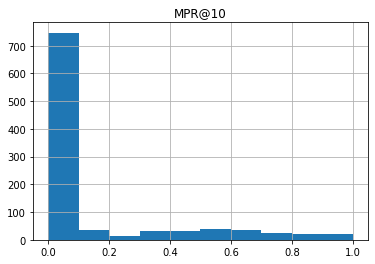

In [761]:
mpr.hist()

In [ ]:
test_metrics = recometrics.calc_reco_metrics(
    t_train_data, t_test_data, t_user_factors, t_item_factors,
    k=3, all_metrics=True
)

In [102]:
model.fit(apply_alpha_log(coo_train, 10), show_progress=True)

100%|██████████| 10/10 [02:31<00:00, 15.17s/it]


In [103]:
metrics_lastfm_alphalog = ranking_metrics_at_k(model, csr_train, csr_val, K=12, show_progress=True, num_threads=4)

100%|██████████| 143217/143217 [01:47<00:00, 1338.41it/s]


In [104]:
print(metrics_lastfm_alphalog)

{'precision': 0.05249255439839029, 'map': 0.012897876772244268, 'ndcg': 0.02783080566674384, 'auc': 0.5137784479605413}


In [95]:
metrics_lastfm_alpha = ranking_metrics_at_k(model, csr_train, csr_val, K=12, show_progress=True, num_threads=4)

100%|██████████| 143217/143217 [02:02<00:00, 1173.82it/s]


In [96]:
print(metrics_lastfm_alpha)

{'precision': 0.02268123300183185, 'map': 0.006544941070392487, 'ndcg': 0.013727028093378921, 'auc': 0.5079965233967513}


In [92]:
print(metrics_lastfm)

{'precision': 0.03955566214402711, 'map': 0.009183045747414444, 'ndcg': 0.0204139358779609, 'auc': 0.5091654091285858}


In [85]:
metrics12_csr_v2 = ranking_metrics_at_k(model, csr_train, csr_val, K=12, show_progress=True, num_threads=4)

100%|██████████| 127453/127453 [00:39<00:00, 3190.39it/s]


In [77]:
metrics12_coo = ranking_metrics_at_k(model, csr_train, csr_val, K=12, show_progress=True, num_threads=4)

100%|██████████| 127432/127432 [00:40<00:00, 3165.33it/s]


In [86]:
print(metrics12_csr_v2)

{'precision': 0.07121407936749277, 'map': 0.03559369845944202, 'ndcg': 0.049003219445839456, 'auc': 0.5367455479423412}


In [78]:
print(metrics12_coo)

{'precision': 0.07172973693227243, 'map': 0.03600024642898094, 'ndcg': 0.04950867598058593, 'auc': 0.5371619143960749}


In [68]:
print(metrics12_csr)

{'precision': 0.002290361312064251, 'map': 0.0006759050730795196, 'ndcg': 0.0014960162353700602, 'auc': 0.5010293244876979}


In [62]:
print(metrics12_df)

{'precision': 0.07109649728052686, 'map': 0.036254443583044756, 'ndcg': 0.0494728674601154, 'auc': 0.5369186522880177}


In [58]:
matrices = get_val_matrices(df_agg)
coo_train, csr_train, csr_val = matrices['coo_train'], matrices['csr_train'], matrices['csr_val']

In [93]:
model_alpha = implicit.als.AlternatingLeastSquares(factors=200, 
                                                 iterations=10, 
                                                 regularization=0.01,
                                                 random_state=42)

model = implicit.als.AlternatingLeastSquares(factors=200, 
                                                 iterations=10, 
                                                 regularization=0.01,
                                                 random_state=42)

In [101]:
model_alpha.fit(apply_alpha(coo_train, 20), show_progress=True)

100%|██████████| 10/10 [01:24<00:00,  8.41s/it]


In [102]:
map12_alphaa = mean_average_precision_at_k(model_alpha, csr_train, csr_val, K=12, show_progress=True, num_threads=4)

100%|██████████| 127577/127577 [00:59<00:00, 2134.45it/s]


In [98]:
map12 = mean_average_precision_at_k(model, csr_train, csr_val, K=12, show_progress=True, num_threads=4)

100%|██████████| 127577/127577 [01:00<00:00, 2103.52it/s]


In [106]:
metrics12 = ranking_metrics_at_k(model_alpha, csr_train, csr_val, K=12, show_progress=True, num_threads=4)

100%|██████████| 127577/127577 [00:56<00:00, 2275.56it/s]


In [110]:
metrics_df = pd.DataFrame(metrics12, index=[12])

In [105]:
from implicit.evaluation import precision_at_k, AUC_at_k, ranking_metrics_at_k

In [79]:
matrices = get_val_matrices(df_agg)
coo_train, csr_train, csr_val = matrices['coo_train'], matrices['csr_train'], matrices['csr_val']
ndcg12 = ndcg_at_k(model, csr_train, csr_val, K=12, show_progress=True, num_threads=4)

100%|██████████| 127577/127577 [00:31<00:00, 4096.24it/s]


In [91]:
matrices = get_val_matrices(df_agg)
coo_train, csr_train, csr_val = matrices['coo_train'], matrices['csr_train'], matrices['csr_val']
map12 = mean_average_precision_at_k(model, csr_train, csr_val, K=12, show_progress=True, num_threads=4)

100%|██████████| 127577/127577 [00:32<00:00, 3940.13it/s]


In [89]:
matrices = get_val_matrices(df_agg)
map12 = validate(matrices, factors=200, iterations=10, regularization=0.01, alpha=10, show_progress=False)

Factors: 200 - Iterations: 10 - Regularization: 0.010 ==> MAP@12: 0.04236
